In [1]:
import matplotlib.pyplot as plt
from Utils.functions import *

In [2]:
# Environment
lw_ = 1.3
fs1_ = 6.5; fs2_ = 8.0
alp1_ = 0.3; alp2_ = 0.2; alp3_ = 1.0
plt.rcParams['xtick.labelsize'] = fs1_
plt.rcParams['ytick.labelsize'] = fs2_
plt.style.use('bmh')

**Definitions:**

1. Important constants are defined.
2. Essensial arrays are initialized.

In [3]:
# Contants
MS = np.loadtxt(f'./Data/Summary.txt', usecols=(1), unpack=True)[9] # Saturation Magnetization
n  = 50  # Number of Experiments
X1 = 200 # Curve Points

# Create Arrays
M_ZFC   = np.zeros((n,X1)) # ZFC Magnetization (Data)
M_FC    = np.zeros((n,X1)) # FC Magnetization (Data)   
ΔM      = np.zeros((n,X1)) # ZFC-FC (Data)
ΔM_pred = np.zeros((n,X1)) # ZFC-FC (AI Prediction)
ρT      = np.zeros((n,X1)) # Anisotropy Barrier Distribution (Data) 
ρT_pred = np.zeros((n,X1)) # Anisotropy Barrier Distribution (AI Prediction)     
TB      = np.zeros(n)      # Blocking Temperature (ML Prediction)     

**Data Processing and Machine Learning Model:**

3. Dataset are read.
4. Machine Learning models are implemented.
5. Anisotropy Barrier Distribution is computed as $\rho(T) = \frac{d(M_{ZFC}-M_{FC})}{dT}$.
6. Blocking Temperature is computed as $T_B = argmax\{\rho(T)\}$.

In [4]:
for i in range(n):    
    
    # Read Data
    t, T, M_ZFC[i], M_FC[i] = np.loadtxt(f'./Data/Data/{i}/M(t,T).txt', usecols=(0,1,2,3), unpack=True) 

    # Data Processing
    T          = T - 273.15 # Kelvin to Celsius
    ΔM[i]      = M_ZFC[i] - M_FC[i]        
    ΔM_pred[i] = model(T, ΔM[i])  # --> Here, the AI works!           
    ρT[i]      = np.gradient(ΔM[i], T)      
    ρT_pred[i] = np.gradient(ΔM_pred[i], T)     
    TB[i]      = T[np.argmax(ρT_pred[i])]  

7. Data range from $-200$ °C and $100$ °C.

In [5]:
# Old Temperature Limits
min(T).round(2), max(T).round(2)

(-266.17, 326.85)

In [6]:
# New Temperature Limits
cond    = (T >= -201) & (T <= 101) # T = [-200, 100] °C
T       = T[cond]
M_ZFC   = M_ZFC[:, cond]
M_FC    = M_FC[:, cond]
ΔM      = ΔM[:, cond]
ΔM_pred = ΔM_pred[:, cond]
ρT      = ρT[:, cond]
ρT_pred = ρT_pred[:, cond]
X1      = len(T)

**1st Visualization:**

8. Three random samples are choosen.

In [7]:
# Random Samples
samples = np.random.randint(0,49,3)
samples

array([48, 13, 46])

9. $M_{ZFC}$, $M_{FC}$, $M_{ZFC}-M_{FC}$, and $\rho(T)$ are plotted as a function of temperature.

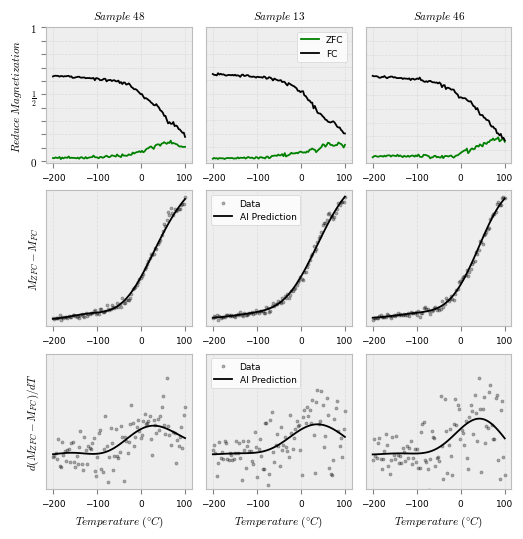

In [8]:
# Plot
fig, ax = plt.subplots(3,3, figsize=(6,6))
plt.subplots_adjust(wspace=0.1)

for i in range(3):
    
    # 1st Row: M vs T
    ax[0,i].plot(T, M_ZFC[samples[i],:]/MS, color='green', linewidth=lw_, label='ZFC')
    ax[0,i].plot(T, M_FC[samples[i],:]/MS, color='black', linewidth=lw_, label='FC')  
    ax[0,i].tick_params(axis='both', direction='out', colors='gray', labelcolor='black')
    ax[0,i].set_yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0], ['$0$','','','','','$\\frac{1}{2}$','','','','','$1$']) 
    ax[0,i].grid(alpha=alp1_)   

    # 2nd Row: M_ZFC-M_FC vs T
    ax[1,i].scatter(T, ΔM[samples[i],:], s=5, alpha=alp1_, color='black', label='Data')
    ax[1,i].plot(T, ΔM_pred[samples[i],:], color='black', linewidth=lw_, label='AI Prediction')
    ax[1,i].tick_params(axis='both', direction='out', colors='gray', labelcolor='black')
    ax[1,i].set_yticks([]); ax[1,i].grid(alpha=alp1_)  

    # 3rd Row: ρT vs T 
    ax[2,i].scatter(T, ρT[samples[i],:], s=5, alpha=alp1_, color='black', label='Data')
    ax[2,i].plot(T, ρT_pred[samples[i],:], color='black', linewidth=lw_, label='AI Prediction')
    ax[2,i].tick_params(axis='both', direction='out', colors='gray', labelcolor='black')
    ax[2,i].set_yticks([]); ax[2,i].set_ylim([-2000,6000]); ax[2,i].grid(alpha=alp1_)  

    # Labels and Titles
    ax[2,i].set_xlabel('$Temperature \ (\degree C)$', fontsize=fs2_)
    ax[0,i].set_title(f'$Sample \ {samples[i]}$', fontsize=fs2_)

ax[0,1].tick_params(axis='y', colors='white'); ax[0,2].tick_params(axis='y', colors='white')
ax[0,1].set_yticklabels([]); ax[0,2].set_yticklabels([])
ax[0,0].set_ylabel('$Reduce \ Magnetization$', fontsize=fs2_)
ax[1,0].set_ylabel('$M_{ZFC}-M_{FC}$', fontsize=fs2_)
ax[2,0].set_ylabel('$d(M_{ZFC}-M_{FC})/dT$', fontsize=fs2_)
ax[0,1].legend(facecolor='white', loc='upper right', fontsize=fs1_)
ax[1,1].legend(facecolor='white', loc='upper left', fontsize=fs1_)
ax[2,1].legend(facecolor='white', loc='upper left', fontsize=fs1_)

plt.show()

In [9]:
# Save
fig.savefig('./Images/Image_1.jpg', bbox_inches='tight', pad_inches=0.1, dpi=300) 

**Statistics and 2nd Visualization:**

10. Mean, Standard Deviation, and Marginal Error are computed.

In [10]:
# Mean, Standard Deviation, and Marginal Error
M_ZFC_                          = np.array([mean_std_error(n, M_ZFC[:,i]) for i in range(X1)])   # Auxiliar M_ZFC
M_ZFC_m, M_ZFC_s, M_ZFC_e       = M_ZFC_[:,0], M_ZFC_[:,1], M_ZFC_[:,2]        
M_FC_                           = np.array([mean_std_error(n, M_FC[:,i]) for i in range(X1)])    # Auxiliar M_FC
M_FC_m, M_FC_s, M_FC_e          = M_FC_[:,0], M_FC_[:,1], M_FC_[:,2]       
ρT_                             = np.array([mean_std_error(n, ρT[:,i]) for i in range(X1)])      # Auxiliar ρT
ρT_m, ρT_s, ρT_e                = ρT_[:,0], ρT_[:,1], ρT_[:,2]          
ρT_pred_                        = np.array([mean_std_error(n, ρT_pred[:,i]) for i in range(X1)]) # Auxiliar ρT_pred
ρT_pred_m, ρT_pred_s, ρT_pred_e = ρT_pred_[:,0], ρT_pred_[:,1], ρT_pred_[:,2]   
TB_m, TB_s, TB_e                = mean_std_error(n,TB)                                           

**Note 1:** The 50 numerical experiments are averaged to generate unique plots.    
**Note 2:** The marginal error and confidence intervals are constructed with 99% fidelity assuming a Student's t-distribution.

11. $M_{ZFC}$, $M_{FC}$, and $\rho(T)$ (data and AI) average are plotted as a function of temperature.

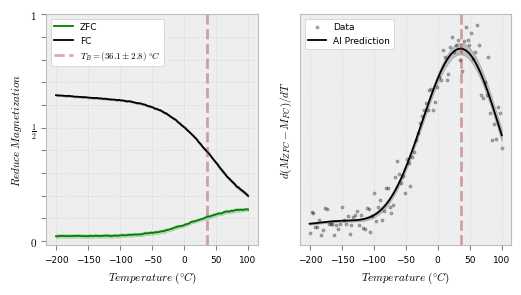

In [11]:
# Plot
fig,ax = plt.subplots(1,2, figsize=(6,3))
fig.subplots_adjust(wspace=0.20)

# 1st Axis: M vs T
ax[0].plot(T, M_ZFC_m/MS, color='green', linewidth=lw_, label='ZFC')
ax[0].fill_between(T,(M_ZFC_m-M_ZFC_e)/MS,(M_ZFC_m+M_ZFC_e)/MS, color='green', alpha=alp2_)
ax[0].plot(T, M_FC_m/MS, color='black', linewidth=lw_, label='FC')
ax[0].fill_between(T, (M_FC_m-M_FC_e)/MS, (M_FC_m+M_FC_e)/MS, color='black', alpha=alp2_)
ax[0].axvline(TB_m, color='brown', ls='--', alpha=2.0*alp2_, label=f'$T_B = ({TB_m:0.1f} \pm {TB_e:0.1f}) \ \degree C$')
ax[0].set_xlabel('$Temperature \ (\degree C)$', fontsize=fs2_); ax[0].set_ylabel('$Reduce \ Magnetization$', fontsize=fs2_)
ax[0].tick_params(axis='both', direction='out', colors='gray', labelcolor='black')
ax[0].set_yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0], ['$0$','','','','','$\\frac{1}{2}$','','','','','$1$']) 
ax[0].legend(facecolor='white', loc='upper left', fontsize=fs1_, framealpha=alp3_).set_zorder(2); ax[0].grid(alpha=alp1_)   

# 2nd Axis: ρT vs T 
ax[1].scatter(T, ρT_m, color='black', s=5, alpha=alp1_, label='Data'); ax[1].plot(T,ρT_pred_m, color='black', linewidth=lw_, label='AI Prediction')
ax[1].fill_between(T, (ρT_pred_m-ρT_pred_e), (ρT_pred_m+ρT_pred_e), color='black', alpha=alp2_)
ax[1].axvline(TB_m, color='brown', ls='--', alpha=2.0*alp2_)
ax[1].set_xlabel('$Temperature \ (\degree C)$', fontsize=fs2_); ax[1].set_ylabel('$d(M_{ZFC}-M_{FC})/dT$', fontsize=fs2_)
ax[1].tick_params(axis='both', direction='out', colors='gray', labelcolor='black')
ax[1].legend(facecolor='white', loc='upper left', fontsize=fs1_, framealpha=alp3_).set_zorder(2); ax[1].grid(alpha=alp1_)   
ax[1].set_yticks([]); ax[1].grid(alpha=alp1_)  

plt.show()

In [12]:
# Save
fig.savefig('./Images/Image_2.jpg', bbox_inches='tight', pad_inches=0.1, dpi=300) 